In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from statsmodels. tsa.stattools import adfuller
#from arch.unitroot import PhillipsPerron, ADF
import statsmodels.api as sm
from statsmodels.graphics import tsaplots
import datetime 

%matplotlib inline

sns.set(style="darkgrid")

In [ ]:
ans = pd.read_csv('/content/new_for_cource.csv')

In [ ]:
data = pd.read_csv('/content/data (1).csv')
data

In [ ]:
data.columns

In [ ]:
corrmat = data[['Source', 'Bt-med', 'Bt-min', 'Bt-max', 'Bx-med',
       'Bx-min', 'Bx-max', 'By-med', 'By-min', 'By-max', 'Bz-med', 'Bz-min',
       'Bz-max', 'Phi-mean', 'Phi-min', 'Phi-max', 'Theta-med', 'Theta-min',
       'Theta-max', 'Dens-med', 'Dens-min', 'Dens-max', 'Speed-med',
       'Speed-min', 'Speed-max', 'Temp-med', 'Temp-min', 'Temp-max', 'ans']].corr()
plt.figure(figsize=(7, 7))
sns.heatmap(corrmat, square=True)
plt.show()

In [ ]:
for i in range(31):
    print(f'описательная статистика для переменной: {data.columns[i]}: {data.iloc[:, i].describe()}')

In [ ]:
!pip install arch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install statsmodels

In [ ]:


#perform augmented Dickey-Fuller test
res = adfuller(data['ans'], regression = 'ct')
print('Augmneted Dickey_fuller Statistic: %f' % res[0])
print('p-value: %f' % res[1])
 
# printing the critical values at different alpha levels.
print('critical values at different levels:')
for k, v in res[4].items():
    print('\t%s: %.3f' % (k, v))

In [ ]:
PhillipsPerron(data["ans"])

In [ ]:
kpss = sm.tsa.stattools.kpss(data['ans'], regression='ct')
print('KPSS Statistic: %f' % kpss[0])
print('p-value: %f' % kpss[1])
 
# printing the critical values at different alpha levels.
print('critical values at different levels:')
for k, v in kpss[3].items():
    print('\t%s: %.3f' % (k, v))

In [ ]:
fig = tsaplots.plot_acf(data['ans'], lags=100)
plt.show()

In [ ]:
base = datetime.datetime(1960, 1, 1)
date_list = [base + datetime.timedelta(days=x) for x in range(21915)]
date_list[-1]

datetime.datetime(2019, 12, 31, 0, 0)

In [ ]:
ssn = pd.DataFrame()

In [ ]:
ssn['date'] = date_list
ssn['ans'] = ans
#ssn.set_index(ssn['date'])
ssn

,date,ans
0,1960-01-01,193
1,1960-01-02,200
2,1960-01-03,210
3,1960-01-04,227
4,1960-01-05,238
...,...,...
21910,2019-12-27,0
21911,2019-12-28,0
21912,2019-12-29,0
21913,2019-12-30,0


In [ ]:
ssn['ans'].describe()

In [ ]:
ans.plot()

In [ ]:
res = adfuller(ans, regression = 'c')
print('Augmneted Dickey_fuller Statistic: %f' % res[0])
print('p-value: %f' % res[1])
 
# printing the critical values at different alpha levels.
print('critical values at different levels:')
for k, v in res[4].items():
    print('\t%s: %.3f' % (k, v))

In [ ]:
PhillipsPerron(ans)

In [ ]:
kpss = sm.tsa.stattools.kpss(ans, regression='ct')
print('KPSS Statistic: %f' % kpss[0])
print('p-value: %f' % kpss[1])
 
# printing the critical values at different alpha levels.
print('critical values at different levels:')
for k, v in kpss[3].items():
    print('\t%s: %.3f' % (k, v))

In [ ]:
adf_ct = ADF(ans, trend = 'ct')
adf_ct.summary()

In [ ]:
ADF(ans, trend = 'n')

In [ ]:
fig = tsaplots.plot_acf(ans, lags=100)
plt.show()

In [ ]:
fig = tsaplots.plot_pacf(ans, lags=100)
plt.show()

In [ ]:
import warnings
warnings.filterwarnings('ignore')
from tqdm import tqdm
from itertools import product
ps = range(0, 3)
d=1
qs = range(0, 3)
Ps = range(0, 3)
D=1
Qs = range(0, 1)
parameters = product(ps, qs, Ps, Qs)
parameters_list = list(parameters)

In [ ]:
results = []
best_aic = float("inf")

for param in tqdm(parameters_list):
    #try except нужен, потому что на некоторых наборах параметров модель не обучается
    try:
        model=sm.tsa.statespace.SARIMAX(ans, order=(param[0], d, param[1]), 
                                        seasonal_order=(param[2], D, param[3], 365)).fit(disp=-1)
    #выводим параметры, на которых модель не обучается и переходим к следующему набору
    except ValueError:
        print('wrong parameters:', param)
        continue
    aic = model.aic
    #сохраняем лучшую модель, aic, параметры
    if aic < best_aic:
        best_model = model
        best_aic = aic
        best_param = param
    results.append([param, model.aic])

warnings.filterwarnings('default')

result_table = pd.DataFrame(results)
result_table.columns = ['parameters', 'aic']
print(result_table.sort_values(by = 'aic', ascending=True).head())

  0%|          | 0/27 [00:00<?, ?it/s]

In [ ]:
best_model = sm.tsa.statespace.SARIMA(ans, order=(1, 0, 0), 
                                        seasonal_order=(1, 0, 0, 365)).fit(disp=-1)
print(best_model.summary())

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

In [ ]:
from pmdarima.arima.utils import ndiffs

In [ ]:
model = ARIMA(ans, order=(1, 2, 1))  
fitted = model.fit(disp=-1)  
print(fitted.summary())

In [ ]:
ssn.ans[1]

200

In [ ]:
ans_diff = []
for i in range(0, len(ans) - 1):
    ans_diff.append(ssn.ans[i+1]-ssn.ans[i])


<Axes: >

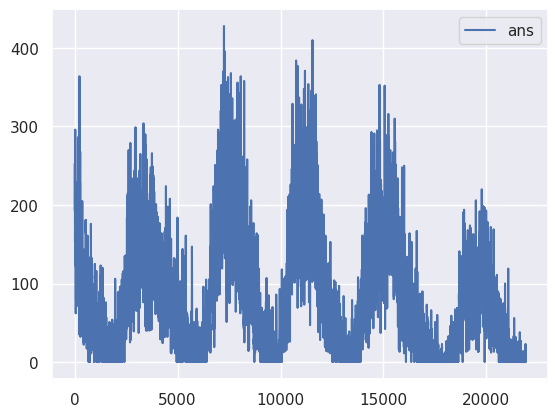

In [ ]:
ans.plot()

In [ ]:
ans_diff = pd.DataFrame(ans_diff)

<Axes: >

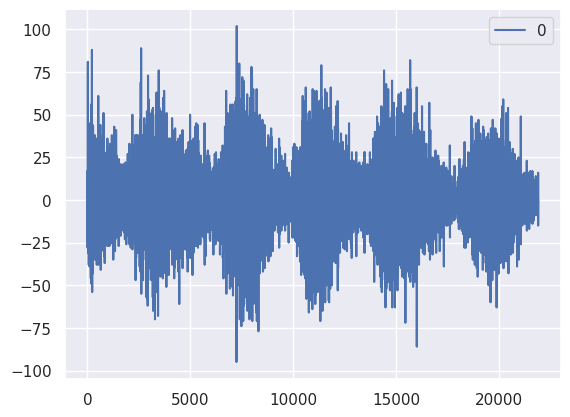

In [ ]:
ans_diff.plot()

In [ ]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
df = ssn
date_list = [base + datetime.timedelta(days=x) for x in range(21915)]
df['index'] = date_list
df = df.rename(columns={"index":"ds", "ans":'y'})

In [ ]:
df[df['y']==0]['y'] += df.rolling(5).mean()[df['y']==0]['y'] 

<ipython-input-8-ede09de5bbdc>:1: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['date', 'ds'], dtype='object')
  df[df['y']==0]['y'] += df.rolling(5).mean()[df['y']==0]['y']
<ipython-input-8-ede09de5bbdc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[df['y']==0]['y'] += df.rolling(5).mean()[df['y']==0]['y']


In [ ]:
import pmdarima as pm

SARIMA_model = pm.auto_arima(df.iloc[:-11*365]['y'], 
                      start_p=1, 
                      start_q=1,
                      test='adf', # use adftest to find optimal 'd'
                      max_p=1, max_q=1, # maximum p and q
                      m=365, # frequency of series (if m==1, seasonal is set to FALSE automatically)
                      d=1, D = 1,# let model determine 'd'
                      seasonal=True, # No Seasonality for standard ARIMA
                      trace=True, #logs 
                      error_action='warn', #shows errors ('ignore' silences these)
                      suppress_warnings=True,
                      stepwise=True)

Performing stepwise search to minimize aic


In [ ]:
import pmdarima as pm

In [ ]:
start_p=1, start_q=1,
                             max_p=3, max_q=3, m=12,
                             start_P=0, seasonal=True,
                             d=1, D=1, trace=True,
                             error_action='ignore',  # don't want to know if an order does not work
                             suppress_warnings=True,  # don't want convergence warnings
                             stepwise=True

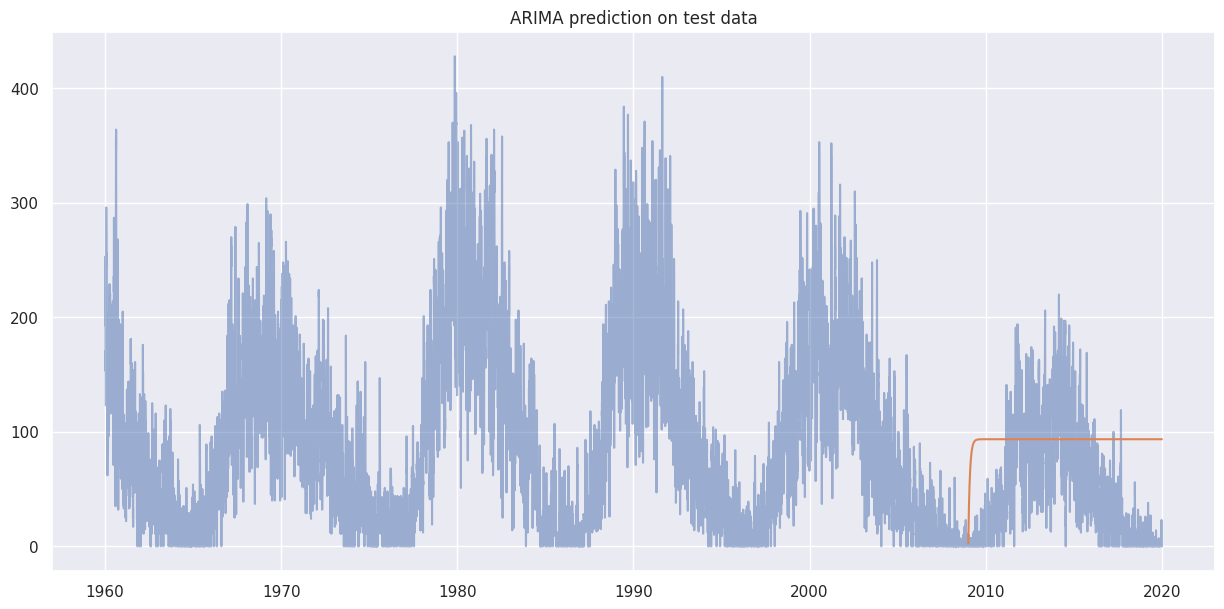

In [ ]:
def forecast(ARIMA_model, periods=11*365):
    # Forecast
    n_periods = periods
    fitted, confint = ARIMA_model.predict(n_periods=n_periods, return_conf_int=True)
    index_of_fc = pd.date_range(df.iloc[-11*365]['ds'] + pd.DateOffset(days=1), periods = n_periods)

    # make series for plotting purpose
    # fitted_series = pd.Series(fitted, index=index_of_fc)
    # lower_series = pd.Series(confint[:, 0], index=index_of_fc)
    # upper_series = pd.Series(confint[:, 1], index=index_of_fc)
    pred = pd.DataFrame(data=fitted, columns=['pred'])
    pred.index = index_of_fc
    plt.figure(figsize=(15,7))
    plt.plot(df['ds'], df["y"], alpha=0.5)
    plt.plot(pred['pred'])
    # plt.fill_between(lower_series.index, 
    #                 lower_series, 
    #                 upper_series, 
    #                 color='k', alpha=.15)
    plt.title("ARIMA prediction on test data")
    plt.show()
a = forecast(SARIMA_model)

In [ ]:
model = pm.auto_arima(df.iloc[:-11*365]['y'], seasonal=True, m=365, 
                      information_criterion='aic', test='kpss',
                      suppress_warnings=True, trace=True)
# The best model
model.set_params()
model.summary()


Performing stepwise search to minimize aic


In [ ]:
from pmdarima.pipeline import Pipeline
from pmdarima.preprocessing import BoxCoxEndogTransformer
import pmdarima as pm

# Fit the model
model = pm.auto_arima(df.iloc[:-11*365]['y'], seasonal=True, m=365, 
                      information_criterion='aic', test='kpss',  
                      maxiter=150,
                      suppress_warnings=True, trace=True, verbose=1)
pred_SARIMA_conf_int = model_SARIMA.predict(test.shape[0], return_conf_int=True)[1]
# Make forecasts
pred_SARIMA = model_SARIMA.predict(test.shape[0])  # predict N steps into the future
# Confidence interval
pred_SARIMA_conf_int = model_SARIMA.predict(test.shape[0], return_conf_int=True)[1]
lower_limits = [k[0] for k in pred_SARIMA_conf_int]
upper_limits = [k[1] for k in pred_SARIMA_conf_int]